In [77]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/plaksha21-cm005-project/sample_submission.csv
/kaggle/input/plaksha21-cm005-project/test.csv
/kaggle/input/plaksha21-cm005-project/train.csv


## EDA and Pre-processing

* Explored statistics on the dataset
* Checked if there are any missing values
* Checked for imbalance in the dataset
* Did train test split with test size=0.2 and stratification

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint
import time
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix, accuracy_score, log_loss

from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier


In [79]:
train_data = pd.read_csv("/kaggle/input/plaksha21-cm005-project/train.csv")
train_data.head()

,m_id,syst_direct_ipo_rate,syst_buffered_ipo_rate,syst_page_fault_rate,syst_page_read_ipo_rate,syst_process_count,syst_other_states,page_page_write_ipo_rate,page_global_valid_fault_rate,page_free_list_size,...,tcp_kpalv,lla0_pkts_recvpsec,lla0_pkts_sentpsec,llb0_pkts_recvpsec,llb0_pkts_sentpsec,ewc0_pkts_recvpsec,ewc0_pkts_sentpsec,ewd0_pkts_recvpsec,ewd0_pkts_sentpsec,cpu_load
0,c,38.50,458.07,0.00,0.0,259,22,0.4,0.00,170323,...,0,415.483,479.983,15.367,20.667,281.383,245.533,278.767,277.300,medium
1,a,66.43,657.65,0.43,0.0,272,12,23.8,0.40,121776,...,0,526.533,554.550,67.300,88.650,438.583,401.633,436.000,366.183,medium
2,f,29.07,322.25,0.00,0.0,171,10,0.0,0.00,271435,...,0,337.967,314.067,0.667,0.017,230.333,230.050,220.200,240.333,low
3,e,1063.13,286.92,4.08,0.0,253,10,0.0,0.15,171316,...,0,336.000,379.833,24.250,33.400,249.767,251.300,178.183,139.733,high
4,f,22.97,369.32,0.00,0.0,165,10,0.0,0.00,280388,...,0,300.833,314.983,0.733,0.017,295.583,257.300,274.200,237.250,low


In [80]:
train_data.describe()

,syst_direct_ipo_rate,syst_buffered_ipo_rate,syst_page_fault_rate,syst_page_read_ipo_rate,syst_process_count,syst_other_states,page_page_write_ipo_rate,page_global_valid_fault_rate,page_free_list_size,page_modified_list_size,...,tcp_retxto,tcp_kpalv,lla0_pkts_recvpsec,lla0_pkts_sentpsec,llb0_pkts_recvpsec,llb0_pkts_sentpsec,ewc0_pkts_recvpsec,ewc0_pkts_sentpsec,ewd0_pkts_recvpsec,ewd0_pkts_sentpsec
count,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,...,119782.000000,119782.000000,1.197820e+05,1.197820e+05,119782.000000,119782.000000,1.197820e+05,1.197820e+05,1.197820e+05,1.197820e+05
mean,163.301465,684.666261,7.421276,1.606043,243.818529,10.850871,7.229671,2.366581,176817.446202,68123.317477,...,0.075888,0.508833,2.063725e+08,1.375818e+08,31.279652,42.382363,4.687999e+12,7.188179e+12,6.563013e+12,5.313130e+12
std,547.578970,1435.427676,79.390552,21.437873,43.397069,5.428206,8.247744,23.459765,53470.917016,20073.343007,...,0.337381,3.486546,2.915828e+10,2.380783e+10,24.287782,33.278828,4.188527e+14,5.186389e+14,4.955808e+14,4.458990e+14
min,0.000000,0.000000,0.000000,0.000000,165.000000,1.000000,0.000000,0.000000,84609.000000,39823.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.633000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,34.100000,350.370000,0.000000,0.000000,217.000000,10.000000,0.300000,0.000000,132817.000000,54668.000000,...,0.000000,0.000000,3.204500e+02,3.556500e+02,16.200000,21.583000,2.625670e+02,2.450170e+02,2.543670e+02,2.440330e+02
50%,42.850000,558.300000,0.000000,0.000000,247.000000,10.000000,4.430000,0.000000,177264.000000,60634.000000,...,0.000000,0.000000,3.874500e+02,4.642500e+02,21.633000,28.983000,3.273330e+02,3.022915e+02,3.172670e+02,3.014330e+02
75%,70.370000,712.680000,0.020000,0.000000,271.000000,12.000000,11.150000,0.000000,197856.750000,92905.000000,...,0.000000,0.000000,4.601457e+02,5.553170e+02,64.683000,88.733000,4.181000e+02,3.936790e+02,4.097670e+02,3.995830e+02
max,11567.100000,15169.270000,4305.720000,738.820000,323.000000,23.000000,83.330000,788.580000,280780.000000,105380.000000,...,6.000000,54.000000,4.119986e+12,4.119987e+12,78.933000,108.317000,3.743147e+16,3.743147e+16,3.743147e+16,3.743147e+16


In [81]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119782 entries, 0 to 119781
Data columns (total 88 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   m_id                          119782 non-null  object 
 1   syst_direct_ipo_rate          119782 non-null  float64
 2   syst_buffered_ipo_rate        119782 non-null  float64
 3   syst_page_fault_rate          119782 non-null  float64
 4   syst_page_read_ipo_rate       119782 non-null  float64
 5   syst_process_count            119782 non-null  int64  
 6   syst_other_states             119782 non-null  int64  
 7   page_page_write_ipo_rate      119782 non-null  float64
 8   page_global_valid_fault_rate  119782 non-null  float64
 9   page_free_list_size           119782 non-null  int64  
 10  page_modified_list_size       119782 non-null  int64  
 11  io_mailbox_write_rate         119782 non-null  float64
 12  io_split_transfer_rate        119782 non-nul

In [126]:
train_data.corr()

,syst_direct_ipo_rate,syst_buffered_ipo_rate,syst_page_fault_rate,syst_page_read_ipo_rate,syst_process_count,syst_other_states,page_page_write_ipo_rate,page_global_valid_fault_rate,page_free_list_size,page_modified_list_size,...,tcp_retxto,tcp_kpalv,lla0_pkts_recvpsec,lla0_pkts_sentpsec,llb0_pkts_recvpsec,llb0_pkts_sentpsec,ewc0_pkts_recvpsec,ewc0_pkts_sentpsec,ewd0_pkts_recvpsec,ewd0_pkts_sentpsec
syst_direct_ipo_rate,1.000000,0.034246,0.167055,0.168932,0.072361,0.009420,-0.119826,0.171535,-0.087268,0.114042,...,0.006565,0.005111,-0.001289,-0.001099,0.103593,0.100387,0.006477,0.005923,-0.001498,-0.000101
syst_buffered_ipo_rate,0.034246,1.000000,0.034276,0.028839,0.145713,0.004016,0.038404,0.040738,-0.176282,0.241753,...,0.078017,-0.002909,0.000006,-0.000358,0.224844,0.217372,-0.001089,-0.001741,-0.001501,-0.001415
syst_page_fault_rate,0.167055,0.034276,1.000000,0.948283,0.023286,0.008499,-0.014547,0.970694,-0.029038,0.051810,...,0.030551,-0.001550,-0.000416,-0.000535,0.046337,0.043735,-0.000695,-0.001291,-0.000627,-0.001112
syst_page_read_ipo_rate,0.168932,0.028839,0.948283,1.000000,0.020210,0.006847,-0.024978,0.983197,-0.024165,0.039114,...,0.016958,-0.003199,-0.000405,-0.000433,0.035341,0.033524,-0.000680,-0.001037,-0.000853,-0.000892
syst_process_count,0.072361,0.145713,0.023286,0.020210,1.000000,0.267799,0.571984,0.030659,-0.981506,0.850905,...,0.140242,0.012137,0.002449,0.003187,0.846419,0.860096,0.000476,-0.000136,0.000506,-0.002986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
llb0_pkts_sentpsec,0.100387,0.217372,0.043735,0.033524,0.860096,-0.030913,0.603064,0.057015,-0.908975,0.969312,...,0.307629,0.002162,0.001265,0.003064,0.998826,1.000000,-0.000137,-0.002517,-0.004571,-0.002316
ewc0_pkts_recvpsec,0.006477,-0.001089,-0.000695,-0.000680,0.000476,0.004569,0.001809,-0.000504,0.000026,0.000644,...,0.004117,-0.001419,-0.000079,-0.000065,0.000018,-0.000137,1.000000,-0.000155,0.281612,-0.000133
ewc0_pkts_sentpsec,0.005923,-0.001741,-0.001291,-0.001037,-0.000136,0.005154,0.001384,-0.001398,0.001534,-0.002435,...,-0.001330,0.001953,-0.000098,-0.000080,-0.002651,-0.002517,-0.000155,1.000000,-0.000184,0.303319
ewd0_pkts_recvpsec,-0.001498,-0.001501,-0.000627,-0.000853,0.000506,0.006288,-0.000116,-0.000736,0.000243,-0.004102,...,-0.002979,0.002227,-0.000094,-0.000077,-0.004799,-0.004571,0.281612,-0.000184,1.000000,-0.000158


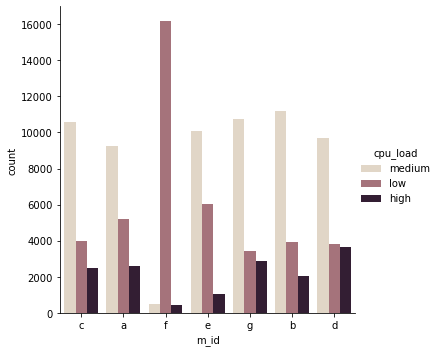

In [82]:
# visualize count of target by m_id

sn.catplot(x="m_id", kind="count",hue="cpu_load", palette="ch:.25", data=train_data)

In [83]:
# dropping m_id column

train_data = train_data.drop(columns = ['m_id'])
train_data.head()

,syst_direct_ipo_rate,syst_buffered_ipo_rate,syst_page_fault_rate,syst_page_read_ipo_rate,syst_process_count,syst_other_states,page_page_write_ipo_rate,page_global_valid_fault_rate,page_free_list_size,page_modified_list_size,...,tcp_kpalv,lla0_pkts_recvpsec,lla0_pkts_sentpsec,llb0_pkts_recvpsec,llb0_pkts_sentpsec,ewc0_pkts_recvpsec,ewc0_pkts_sentpsec,ewd0_pkts_recvpsec,ewd0_pkts_sentpsec,cpu_load
0,38.50,458.07,0.00,0.0,259,22,0.4,0.00,170323,60557,...,0,415.483,479.983,15.367,20.667,281.383,245.533,278.767,277.300,medium
1,66.43,657.65,0.43,0.0,272,12,23.8,0.40,121776,102325,...,0,526.533,554.550,67.300,88.650,438.583,401.633,436.000,366.183,medium
2,29.07,322.25,0.00,0.0,171,10,0.0,0.00,271435,44159,...,0,337.967,314.067,0.667,0.017,230.333,230.050,220.200,240.333,low
3,1063.13,286.92,4.08,0.0,253,10,0.0,0.15,171316,68325,...,0,336.000,379.833,24.250,33.400,249.767,251.300,178.183,139.733,high
4,22.97,369.32,0.00,0.0,165,10,0.0,0.00,280388,40128,...,0,300.833,314.983,0.733,0.017,295.583,257.300,274.200,237.250,low


In [84]:
# Check if there are any missing values

incomplete_rows = train_data[train_data.isnull().any(axis=1)].head()
incomplete_rows

,syst_direct_ipo_rate,syst_buffered_ipo_rate,syst_page_fault_rate,syst_page_read_ipo_rate,syst_process_count,syst_other_states,page_page_write_ipo_rate,page_global_valid_fault_rate,page_free_list_size,page_modified_list_size,...,tcp_kpalv,lla0_pkts_recvpsec,lla0_pkts_sentpsec,llb0_pkts_recvpsec,llb0_pkts_sentpsec,ewc0_pkts_recvpsec,ewc0_pkts_sentpsec,ewd0_pkts_recvpsec,ewd0_pkts_sentpsec,cpu_load


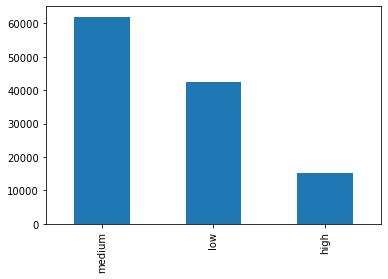

In [85]:
# check for imbalance in the output class

train_data['cpu_load'].value_counts().plot.bar()

In [86]:
#separate input and output

df_output = train_data['cpu_load']
df_input = train_data.drop('cpu_load', axis=1) 
df_input.head()

,syst_direct_ipo_rate,syst_buffered_ipo_rate,syst_page_fault_rate,syst_page_read_ipo_rate,syst_process_count,syst_other_states,page_page_write_ipo_rate,page_global_valid_fault_rate,page_free_list_size,page_modified_list_size,...,tcp_retxto,tcp_kpalv,lla0_pkts_recvpsec,lla0_pkts_sentpsec,llb0_pkts_recvpsec,llb0_pkts_sentpsec,ewc0_pkts_recvpsec,ewc0_pkts_sentpsec,ewd0_pkts_recvpsec,ewd0_pkts_sentpsec
0,38.50,458.07,0.00,0.0,259,22,0.4,0.00,170323,60557,...,0,0,415.483,479.983,15.367,20.667,281.383,245.533,278.767,277.300
1,66.43,657.65,0.43,0.0,272,12,23.8,0.40,121776,102325,...,0,0,526.533,554.550,67.300,88.650,438.583,401.633,436.000,366.183
2,29.07,322.25,0.00,0.0,171,10,0.0,0.00,271435,44159,...,0,0,337.967,314.067,0.667,0.017,230.333,230.050,220.200,240.333
3,1063.13,286.92,4.08,0.0,253,10,0.0,0.15,171316,68325,...,0,0,336.000,379.833,24.250,33.400,249.767,251.300,178.183,139.733
4,22.97,369.32,0.00,0.0,165,10,0.0,0.00,280388,40128,...,0,0,300.833,314.983,0.733,0.017,295.583,257.300,274.200,237.250


In [87]:
# train test split with stratification

train_data_i, test_data_i, train_data_o, test_data_o = train_test_split(df_input, df_output, test_size=0.2, random_state=42, stratify=df_output)

# Modelling approaches taken

* Tried several different models like MLP classifier, decsion tree, random forest taking several combinations and iterations.

* ## MLP classifier

hidden_layers:  [20, 25, 40, 45, 50, 55, 60, 70]
accuracy_values:  [0.8788245606712026, 0.8540718787828192, 0.7535584589055391, 0.6325917268439287, 0.887548524439621, 0.7110656593062571, 0.87886630212464, 0.8211796134741411]


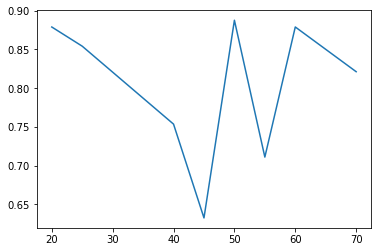

In [89]:
# MLPClassifier with adam optimizer

hidden_layers, accuracy_values = [20, 25, 40, 45, 50, 55, 60, 70], []
for i in hidden_layers:
    clf = MLPClassifier(solver='adam', alpha=1e-4, max_iter=200, hidden_layer_sizes=(i), random_state=42, tol=0.0001, verbose=0 )
    clf.fit(train_data_i,train_data_o)
    pred = clf.predict(test_data_i)
    accuracy_values.append(accuracy_score(test_data_o, pred))
    
print("hidden_layers: ", hidden_layers)
print('accuracy_values: ', accuracy_values)
plt.plot(hidden_layers, accuracy_values)
plt.show()

In [93]:
# Max accuracy score is seen at hidden_layer_sizes 50
clf = MLPClassifier(solver='adam', alpha=1e-4, max_iter=200, hidden_layer_sizes=(50), random_state=42, tol=0.0001, verbose=0 )
clf.fit(train_data_i,train_data_o)
pred = clf.predict(test_data_i)
pred1 = clf.predict_proba(test_data_i)

print("Confusion Matrix: \n", confusion_matrix(test_data_o, pred))
print("Train accuracy_score:", (accuracy_score(train_data_o, clf.predict(train_data_i))))
print("Test accuracy_score:", (accuracy_score(test_data_o, pred)))
log_loss(test_data_o, pred1)

Confusion Matrix: 
 [[ 1765    97  1172]
 [    4  7988   527]
 [  191   703 11510]]
Train accuracy_score: 0.8836316201408818
Test accuracy_score: 0.887548524439621


3.005345934005567

* ## Decision Tree Classification baseline

In [96]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(train_data_i,train_data_o)
pred = clf.predict(test_data_i)
pred1 = clf.predict_proba(test_data_i)

print("Confusion Matrix: \n", confusion_matrix(test_data_o, pred))
print("Train accuracy_score:", (accuracy_score(train_data_o, clf.predict(train_data_i))))
print("Test accuracy_score:", (accuracy_score(test_data_o, pred)))
log_loss(test_data_o, pred1)

Confusion Matrix: 
 [[ 2266    12   756]
 [    7  7776   736]
 [  757   736 10911]]
Train accuracy_score: 1.0
Test accuracy_score: 0.8746086738740243


4.330862974926398

* ## Decision Tree Classification with hyperparameter tuning

In [ ]:
# clf = RandomForestClassifier(random_state=42)
# param_dict_gridcv={"max_depth":range(2,10),
#            "min_samples_split":range(2,10),
#            "min_samples_leaf":range(1,5)}

# param_dict = {'max_depth': [6,9, None],
#               #'n_estimators’: [50,70,100,150],
#               'max_features': randint(1,6),
#               'criterion' : ['gini', 'entropy'],
#               'bootstrap':[True, False],
#               'mln_samples_leaf': randint(1,4)
#              }

# rnd_search  = RandomizedSearchCV(clf,param_distributions=param_dict,cv=5, n_jobs=-1)

# rnd_search.fit(train_data_i,train_data_o)
# pred = rnd_search.predict(test_data_i)


# print("rnd_search: ", rnd_search.best_params_)
# print("rnd_search: ",rnd_search.best_score_)

# print("Confusion Matrix: \n", confusion_matrix(test_data_o, pred))
# print("Train accuracy_score:", (accuracy_score(train_data_o, rnd_search.predict(train_data_i))))
# print("Test accuracy_score:", (accuracy_score(test_data_o, pred)))

* ## Random forest baseline

In [94]:
RandomForestClassifier(n_jobs=-1,random_state=42)
clf.fit(train_data_i,train_data_o)
pred = clf.predict(test_data_i)
pred1 = clf.predict_proba(test_data_i)

print("Confusion Matrix: \n", confusion_matrix(test_data_o, pred))
print("Train accuracy_score:", (accuracy_score(train_data_o, clf.predict(train_data_i))))
print("Test accuracy_score:", (accuracy_score(test_data_o, pred)))
log_loss(test_data_o, pred1)

Confusion Matrix: 
 [[ 1765    97  1172]
 [    4  7988   527]
 [  191   703 11510]]
Train accuracy_score: 0.8836316201408818
Test accuracy_score: 0.887548524439621


3.005345934005567

In [97]:
# clf=RandomForestClassifier(bootstrap=False, max_features=15, n_estimators=400, n_jobs=-1, random_state=42, max_depth=22)
# clf.fit(train_data_i,train_data_o)
# pred = clf.predict(test_data_i)
# pred1 = clf.predict_proba(test_data_i)

# print("Confusion Matrix: \n", confusion_matrix(test_data_o, pred))
# print("Train accuracy_score:", (accuracy_score(train_data_o, clf.predict(train_data_i))))
# print("Test accuracy_score:", (accuracy_score(test_data_o, pred)))
# log_loss(test_data_o, pred1)

In [98]:
# clf=RandomForestClassifier(bootstrap=False, max_features=22, n_estimators=400, n_jobs=-1, random_state=42, max_depth=22)
# clf.fit(train_data_i,train_data_o)
# pred = clf.predict(test_data_i)
# pred1 = clf.predict_proba(test_data_i)

# print("Confusion Matrix: \n", confusion_matrix(test_data_o, pred))
# print("Train accuracy_score:", (accuracy_score(train_data_o, clf.predict(train_data_i))))
# print("Test accuracy_score:", (accuracy_score(test_data_o, pred)))
# log_loss(test_data_o, pred1)

* ## Random forest with hyperparameter tuning

In [41]:
# Function for hyperparameters tuning

def hyperparameter_tune(base_model, parameters, n_iter, kfold, X, y):
    start_time = time.time()
    
    # Arrange data into folds with approx equal proportion of classes within each fold
    k = StratifiedKFold(n_splits=kfold, shuffle=True)
    
    optimal_model = RandomizedSearchCV(base_model,
                            param_distributions=parameters,
                            n_iter=n_iter,
                            cv=k,
                            #n_jobs=-1,
                            random_state=42,    
                            verbose=2,
                            scoring="neg_log_loss")
    
    optimal_model.fit(X, y)
    
    stop_time = time.time()
    
    print("Elapsed Time:", time.strftime("%H:%M:%S", time.gmtime(stop_time - start_time)))
    print("====================")
    print("Best Score: {:.3f}".format(optimal_model.best_score_))
    print("Best Parameters: {}".format(optimal_model.best_params_))
    
    return optimal_model

In [42]:
# Random forest with hyperparameter tuning

base_model = RandomForestClassifier(n_jobs=-1,
                                   random_state=42)

parameters = {
    "max_depth": [None, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
    "n_estimators": [350, 400, 450, 500, 550, 600],
    "max_features": ["auto", 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
    #"criterion": ["gini", "entropy"],
    "bootstrap": [False, True],
    "class_weight": [None, "balanced"]
}


optimal_model = hyperparameter_tune(base_model, parameters, 20, 5, train_data_i,train_data_o)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=350, max_features=15, max_depth=22, class_weight=balanced, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=350, max_features=15, max_depth=22, class_weight=balanced, bootstrap=True, total= 1.3min
[CV] n_estimators=350, max_features=15, max_depth=22, class_weight=balanced, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


[CV]  n_estimators=350, max_features=15, max_depth=22, class_weight=balanced, bootstrap=True, total= 1.3min
[CV] n_estimators=350, max_features=15, max_depth=22, class_weight=balanced, bootstrap=True 
[CV]  n_estimators=350, max_features=15, max_depth=22, class_weight=balanced, bootstrap=True, total= 1.4min
[CV] n_estimators=350, max_features=15, max_depth=22, class_weight=balanced, bootstrap=True 
[CV]  n_estimators=350, max_features=15, max_depth=22, class_weight=balanced, bootstrap=True, total= 1.4min
[CV] n_estimators=350, max_features=15, max_depth=22, class_weight=balanced, bootstrap=True 
[CV]  n_estimators=350, max_features=15, max_depth=22, class_weight=balanced, bootstrap=True, total= 1.4min
[CV] n_estimators=450, max_features=25, max_depth=25, class_weight=None, bootstrap=False 
[CV]  n_estimators=450, max_features=25, max_depth=25, class_weight=None, bootstrap=False, total= 4.6min
[CV] n_estimators=450, max_features=25, max_depth=25, class_weight=None, bootstrap=False 
[CV]

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 315.8min finished


Elapsed Time: 05:21:23
Best Score: -0.210
Best Parameters: {'n_estimators': 450, 'max_features': 25, 'max_depth': 25, 'class_weight': None, 'bootstrap': False}


In [48]:
optimal_model.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=25, max_features=25,
                       n_estimators=450, n_jobs=-1, random_state=42)

In [49]:
pred = optimal_model.predict(test_data_i)
pred1 = optimal_model.predict_proba(test_data_i)

print("Confusion Matrix: \n", confusion_matrix(test_data_o, pred))
print("Train accuracy_score:", (accuracy_score(train_data_o, clf.predict(train_data_i))))
print("Test accuracy_score:", (accuracy_score(test_data_o, pred)))
log_loss(test_data_o, pred1)

Confusion Matrix: 
 [[ 2340     8   686]
 [    1  7999   519]
 [  325   484 11595]]
Train accuracy_score: 0.9945630054787373
Test accuracy_score: 0.9155570396961222


0.2076425172674666

# Final model with hyper parameters

*  Finally after hyperparameter tuning with randomizedsearchcv with stratified 5 fold cross validation, the random forest model with parameters max_depth=25, bootstrap=False, max_features=25, n_estimators=450 gave the most optimum model with a neg loss loss of -0.210. So taking these parameters for the final model:

In [99]:
clf=RandomForestClassifier(bootstrap=False, max_depth=25, max_features=25,
                       n_estimators=450, n_jobs=-1, random_state=42)
clf.fit(train_data_i,train_data_o)
pred = clf.predict(test_data_i)
pred1 = clf.predict_proba(test_data_i)

print("Confusion Matrix: \n", confusion_matrix(test_data_o, pred))
print("Train accuracy_score:", (accuracy_score(train_data_o, clf.predict(train_data_i))))
print("Test accuracy_score:", (accuracy_score(test_data_o, pred)))
log_loss(test_data_o, pred1)

Confusion Matrix: 
 [[ 2340     8   686]
 [    1  7999   519]
 [  325   484 11595]]
Train accuracy_score: 0.997985911818419
Test accuracy_score: 0.9155570396961222


0.2076425172674666

In [100]:
test_data = pd.read_csv("/kaggle/input/plaksha21-cm005-project/test.csv")
test_data.head()

,id,m_id,syst_direct_ipo_rate,syst_buffered_ipo_rate,syst_page_fault_rate,syst_page_read_ipo_rate,syst_process_count,syst_other_states,page_page_write_ipo_rate,page_global_valid_fault_rate,...,tcp_retxto,tcp_kpalv,lla0_pkts_recvpsec,lla0_pkts_sentpsec,llb0_pkts_recvpsec,llb0_pkts_sentpsec,ewc0_pkts_recvpsec,ewc0_pkts_sentpsec,ewd0_pkts_recvpsec,ewd0_pkts_sentpsec
0,0,f,30.20,335.77,0.00,0.00,165,10,0.00,0.00,...,0,0,410.567,259.683,0.717,0.017,229.117,375.250,272.233,201.167
1,1,a,75.30,665.08,30.33,4.53,271,12,9.83,13.45,...,1,0,484.250,516.700,67.817,89.483,666.533,554.267,496.233,387.850
2,2,c,31.02,251.00,0.00,0.00,259,22,0.38,0.00,...,0,0,242.300,251.150,15.483,20.767,229.800,220.300,315.483,277.767
3,3,e,38.78,493.92,0.05,0.00,252,10,7.65,0.05,...,0,0,394.900,515.850,25.033,34.550,302.733,230.600,308.483,273.650
4,4,b,62.83,379.27,0.00,0.00,318,10,0.27,0.00,...,0,0,332.467,290.283,66.050,93.083,226.067,331.033,228.017,233.450


In [101]:
test_data = test_data.drop(columns = ['m_id','id'])
test_data.head()

,syst_direct_ipo_rate,syst_buffered_ipo_rate,syst_page_fault_rate,syst_page_read_ipo_rate,syst_process_count,syst_other_states,page_page_write_ipo_rate,page_global_valid_fault_rate,page_free_list_size,page_modified_list_size,...,tcp_retxto,tcp_kpalv,lla0_pkts_recvpsec,lla0_pkts_sentpsec,llb0_pkts_recvpsec,llb0_pkts_sentpsec,ewc0_pkts_recvpsec,ewc0_pkts_sentpsec,ewd0_pkts_recvpsec,ewd0_pkts_sentpsec
0,30.20,335.77,0.00,0.00,165,10,0.00,0.00,280348,40113,...,0,0,410.567,259.683,0.717,0.017,229.117,375.250,272.233,201.167
1,75.30,665.08,30.33,4.53,271,12,9.83,13.45,135805,101499,...,1,0,484.250,516.700,67.817,89.483,666.533,554.267,496.233,387.850
2,31.02,251.00,0.00,0.00,259,22,0.38,0.00,171796,60556,...,0,0,242.300,251.150,15.483,20.767,229.800,220.300,315.483,277.767
3,38.78,493.92,0.05,0.00,252,10,7.65,0.05,172948,67821,...,0,0,394.900,515.850,25.033,34.550,302.733,230.600,308.483,273.650
4,62.83,379.27,0.00,0.00,318,10,0.27,0.00,88866,93458,...,0,0,332.467,290.283,66.050,93.083,226.067,331.033,228.017,233.450


In [102]:
prob = clf.predict_proba(test_data)
prob

array([[0.00000000e+00, 9.97605245e-01, 2.39475500e-03],
       [9.69555943e-07, 1.58717857e-01, 8.41281174e-01],
       [1.48113353e-05, 9.97729136e-01, 2.25605259e-03],
       ...,
       [5.59049616e-06, 7.05598882e-01, 2.94395527e-01],
       [2.45195117e-03, 1.96518563e-03, 9.95582863e-01],
       [0.00000000e+00, 9.92927800e-01, 7.07219987e-03]])

In [103]:
clf.classes_

array(['high', 'low', 'medium'], dtype=object)

In [104]:
prob_order=prob[:, [1, 2, 0]]
submit = pd.DataFrame(data = prob_order, columns = ['low', 'medium', 'high'])
submit=submit.reset_index()
submit.rename(columns = {'index':'id'}, inplace = True) 
submit.to_csv('submit.csv', index=False)

In [105]:
submit.head()

,id,low,medium,high
0,0,0.997605,0.002395,0.000000e+00
1,1,0.158718,0.841281,9.695559e-07
2,2,0.997729,0.002256,1.481134e-05
3,3,0.822959,0.177041,0.000000e+00
4,4,0.997739,0.002261,0.000000e+00
